<a href="https://colab.research.google.com/github/kanri3/machine_learning/blob/main/non_linear_regression_hands_on.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# 多項式回帰

## 訓練データ生成

In [ ]:
n_sample = 10
var = .25

def sin_func(x):
    return np.sin(2 * np.pi * x) 

def add_noise(y_true, var):
    return y_true + np.random.normal(scale=var, size=y_true.shape)

def plt_result(xs, ys_true, ys):
    plt.scatter(xs, ys,facecolor="none", edgecolor="b", s=50,  label="training data")
    plt.plot(xs, ys_true, label="$\sin(2\pi x)$")
    plt.legend()

xs: (10,)
ys_true: (10,)
ys: (10,)


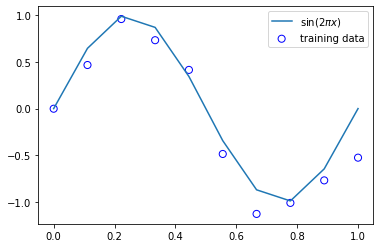

In [ ]:
#データの作成
xs = np.linspace(0, 1, n_sample)
ys_true = sin_func(xs)
ys = add_noise(ys_true, var)

print("xs: {}".format(xs.shape))
print("ys_true: {}".format(ys_true.shape))
print("ys: {}".format(ys.shape))

#結果の描画
plt_result(xs, ys_true, ys)

##学習

In [ ]:
# degree=3は、要するに三次関数に近似させようとしている。
# y=sin(2パイx) （0≦x≦1）は極大値と極小値を各１回とる。
# 三次関数も極大値と極小値を各１回とるから、ちょうどいいんだね。
def polynomial_features(xs, degree=3):
    """多項式特徴ベクトルに変換
         X = [[1, x1, x1^2, x1^3],
                 [1, x2, x2^2, x2^3],
                   ...                             
                 [1, xn, xn^2, xn^3]]"""
    X = np.ones((len(xs), degree+1))
    print("X.shape : {}".format(X.shape))
    # print("X.shape : " + X.shape)
    X_t = X.T
    for i in range(1, degree+1):
        X_t[i] = X_t[i-1] * xs
# 転置したのをまた転置かよ
    return X_t.T

In [ ]:
# Phiはギリシャ文字ファイ
Phi = polynomial_features(xs)
# linalg:linear algebra（線形代数）
# numpy.linalg.inv()で逆行列
# Phi_invは名前がおかしいでしょう。要はこれ、3乗してんだから
Phi_cubed = np.dot(np.linalg.inv(np.dot(Phi.T, Phi)), Phi.T)
# Phi_inv = np.dot(np.linalg.inv(np.dot(Phi.T, Phi)), Phi.T)
w = np.dot(Phi_cubed, ys)

X.shape : (10, 4)


##予測

In [ ]:
Phi_test = polynomial_features(xs)
ys_pred = np.dot(Phi_test, w)

X.shape : (10, 4)


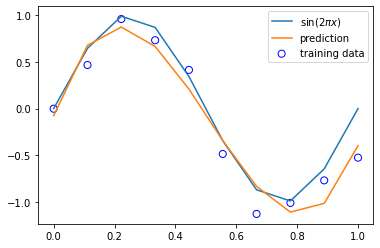

In [ ]:
plt.scatter(xs, ys, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(xs, ys_true, label="$\sin(2\pi x)$")
plt.plot(xs, ys_pred, label="prediction")
# for i in range(0, 4):
#     plt.plot(xs, Phi[:, i], label="basis")
plt.legend()
plt.show()